In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [20]:
def circle(x, y, x_arr, y_arr, r=1):
    return np.sum((y - np.array(y_arr)) ** 2) + np.sum((np.array(x_arr) - x) ** 2)

x_points = np.array([1, 1, 2, 3]) 
y_points = np.array([-1, 2, 2, 0])

a = minimize(lambda x: circle(x[0], x[1], x_points, y_points), [1, 1])
print(a.x)

[1.74999998 0.74999991]


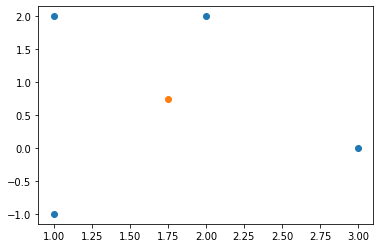

In [21]:
plt.scatter(x, y)
plt.scatter(a.x[0], a.x[1])

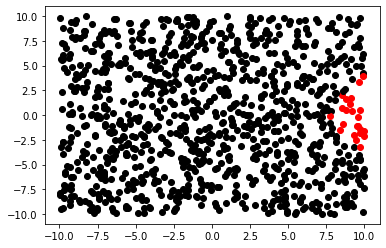

In [54]:
from scipy.optimize import newton

coeffs = (1, -11, 9, 11, -10)
poly = np.poly1d(coeffs)

N = 1000

points = (np.random.rand(N) * 20 - 10) + (np.random.rand(N) * 20 - 10) * 1j
for point in points:
    solution = newton(poly, point, poly.deriv(1))
    color = "black"
    if np.allclose(solution, 10):
        color = "red"
    plt.scatter(point.real, point.imag, color = color)

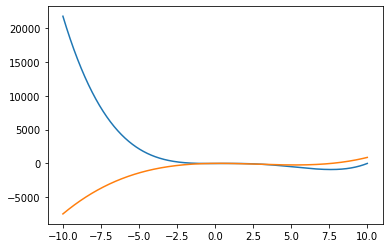

In [42]:
x = np.linspace(-10, 10, 1000)
plt.plot(x, poly(x))
plt.plot(x, poly.deriv(1)(x))

In [77]:
from sklearn.datasets import load_digits
digits = load_digits()
A = digits.data
y = digits.target
print(A.shape, y)

(1797, 64) [0 1 2 ... 8 9 8]


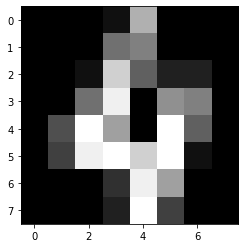

In [70]:
A_norm = A / np.max(A)
plt.imshow(A_norm[4].reshape(8, 8), cmap="gray")

In [79]:
u, s, wh = np.linalg.svd(A_norm)
print(s[:10])

[137.06995855  35.43729824  33.8753083   31.50948109  26.59956033
  22.07614043  20.02348974  18.87965062  17.47231031  16.78246541]


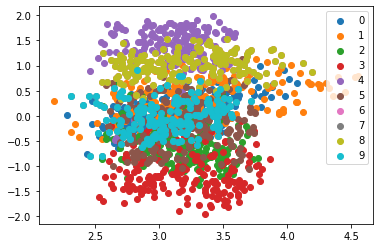

In [86]:
projections = u[:, :2] @ np.diag(s[:2])
projections.shape

colors = ["red", "green", "blue", "yellow", "magenta", "cyan", "orange", "purple", "pink", "gray"]

plt.scatter(projections[:, 0][y ==  0], projections[:, 1][y == 0], label="0")
plt.scatter(projections[:, 0][y ==  1], projections[:, 1][y == 1], label="1")
plt.scatter(projections[:, 0][y ==  2], projections[:, 1][y == 2], label="2")
plt.scatter(projections[:, 0][y ==  3], projections[:, 1][y == 3], label="3")
plt.scatter(projections[:, 0][y ==  4], projections[:, 1][y == 4], label="4")
plt.scatter(projections[:, 0][y ==  5], projections[:, 1][y == 5], label="5")
plt.scatter(projections[:, 0][y ==  6], projections[:, 1][y == 6], label="6")
plt.scatter(projections[:, 0][y ==  7], projections[:, 1][y == 7], label="7")
plt.scatter(projections[:, 0][y ==  6], projections[:, 1][y == 6], label="8")
plt.scatter(projections[:, 0][y ==  7], projections[:, 1][y == 7], label="9")

plt.legend()